# Introduction to Convolution Neural Networks

## Import the libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

2022-10-14 07:24:23.549720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing
Our MNIST images only have a depth of 1, but we must explicitly declare that

In [4]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Create and compile the model.

In [6]:
cnn = Sequential()

2022-10-14 07:25:02.816097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [8]:
cnn.add(MaxPooling2D())

In [9]:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))

In [10]:
cnn.add(MaxPooling2D())

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(1024, activation='relu'))

In [13]:
cnn.add(Dense(10,activation='softmax'))

In [14]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

## Train the model

In [21]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Epoch 1/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0.0086 - val_accuracy: 0.9970
Epoch 2/5
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0069 - val_accuracy: 0.9980
Epoch 3/5
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0046 - val_accuracy: 0.9986
Epoch 4/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0072 - val_accuracy: 0.9978
Epoch 5/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0099 - val_accuracy: 0.9976


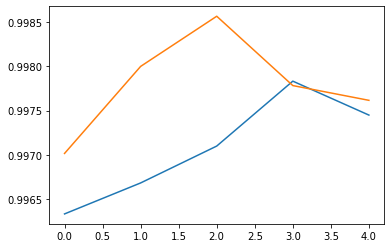

In [23]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [19]:
cnn.load_weights('weights/cnn-model5.h5')

In [26]:
score = cnn.evaluate('X_test, y_test')

IndexError: tuple index out of range